In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import influxdb_client
from IPython.display import Image
import csv

from influxdb_client.client.write_api import SYNCHRONOUS

import warnings
from influxdb_client.client.warnings import MissingPivotFunction

warnings.simplefilter("ignore", MissingPivotFunction)

# configure influxdb client
ORG = "b4mad"
TOKEN = os.environ.get(
    "INFLUXDB_TOKEN",
    "citqAMr66LLb25hvaaZm2LezOc88k2ocOFJcJDR6QB-RmLJa_-sAr9kYB4vSFYaz8bt26lm7SokVgpQKdgKFKA==",
)
URL = "https://telemetry.b4mad.racing/"

client = influxdb_client.InfluxDBClient(url=URL, token=TOKEN, org=ORG)
query_api = client.query_api()
pd.set_option("display.max_columns", None)

In [62]:
# a function to query the database for a given session and lap
def query_session_lap(session, lap):
    query = f"""
    from(bucket: "racing")
    |> range(start: -10y, stop: now())
    |> filter(fn: (r) => r["_measurement"] == "laps_cc")
    |> filter(fn: (r) => r["SessionId"] == "{session}")
    |> pivot(rowKey: ["_time"], columnKey: ["_field"], valueColumn: "_value")
    |> filter(fn: (r) => r["CurrentLap"] == "{lap}")
    |> sort(columns: ["_time"], desc: false)
    """
    return query_api.query_data_frame(org=ORG, query=query)

In [63]:
def multiplot_from_generator(g, num_columns, figsize_for_one_row=None):
    # call 'next(g)' to get past the first 'yield'
    next(g)
    # default to 15-inch rows, with square subplots
    if figsize_for_one_row is None:
        figsize_for_one_row = (15, 15 / num_columns)
    try:
        while True:
            # call plt.figure once per row
            plt.figure(figsize=figsize_for_one_row)
            for col in range(num_columns):
                ax = plt.subplot(1, num_columns, col + 1)
                next(g)
            # flush the plot to the notebook
            plt.show()
    except StopIteration:
        # flush the plot to the notebook
        plt.show()
        pass

In [64]:
tracks = {}
# open csv file with track data and read it into dictionary
with open("tracks.csv") as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row["game"] not in tracks:
            tracks[row["game"]] = {}
        if row["track"] not in tracks[row["game"]]:
            tracks[row["game"]][row["track"]] = {}

        if row["session"] not in tracks[row["game"]][row["track"]]:
            tracks[row["game"]][row["track"]][row["session"]] = []
        tracks[row["game"]][row["track"]][row["session"]] += [row["lap"]]

Assetto Corsa (64 bit) - simtraxx_zeran:rally1
1670215352 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:39:46.922384+00:00,2022-12-11 09:39:46.922384+00:00,2022-12-05 05:42:33.387476+00:00,porsche_550_1500_rs_spyder_s1,1,Assetto Corsa (64 bit),1670215352,HotLap,simtraxx_zeran:rally1,laps_cc,telegraf,crewchief/Jim/1670215352/Assetto Corsa (64 bit...,Jim,1.0,0.0,0.0,184.898422,3.0,0.0,1089.0,0.001812,0.0,0.0,230.180786,0.933547,-240.049545


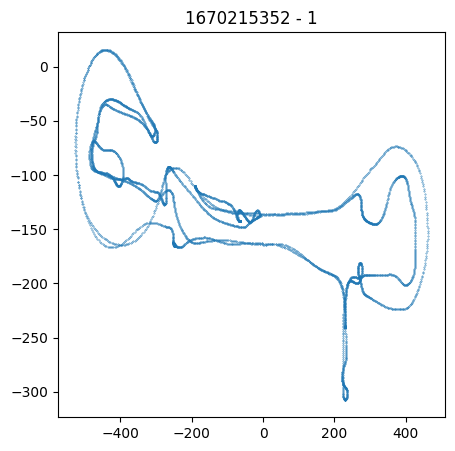

Assetto Corsa (64 bit) - monza:
1670610257 - 6


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:39:48.477535+00:00,2022-12-11 09:39:48.477535+00:00,2022-12-09 19:35:50.198756+00:00,rss_formula_hybrid_2022_s,6,Assetto Corsa (64 bit),1670610257,Qualify,monza:,laps_cc,telegraf,crewchief/Jim/1670610257/Assetto Corsa (64 bit...,Jim,0.0,1.0,91.137,2222.03027,3.0,0.0,11122.0,40.712055,0.02034,1.0,679.9878,0.729221,-1198.92017


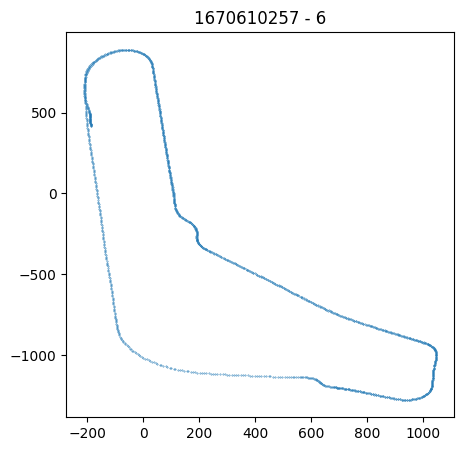

Assetto Corsa (64 bit) - lilski_watkins_glen:boot
1670334313 - 3


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:39:49.580756+00:00,2022-12-11 09:39:49.580756+00:00,2022-12-06 13:52:35.520988+00:00,urd_maures_gtr_97,3,Assetto Corsa (64 bit),1670334313,Race,lilski_watkins_glen:boot,laps_cc,telegraf,crewchief/Jim/1670334313/Assetto Corsa (64 bit...,Jim,0.0,1.0,0.003,1.807929,5.0,0.0,6267.0,68.07621,-0.0052,1.0,-431.619354,6.161228,-624.0784


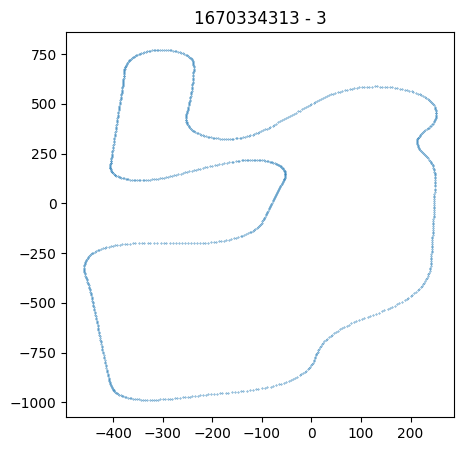

Assetto Corsa (64 bit) - spa:
1670611605 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:39:50.214133+00:00,2022-12-11 09:39:50.214133+00:00,2022-12-09 19:47:09.504246+00:00,rss_formula_rss_3_v6,1,Assetto Corsa (64 bit),1670611605,Qualify,spa:,laps_cc,telegraf,crewchief/Jim/1670611605/Assetto Corsa (64 bit...,Jim,1.0,0.0,3.069,248.210388,0.0,0.0,2500.0,0.002735,0.0,0.0,-356.903778,22.25144,-842.9791


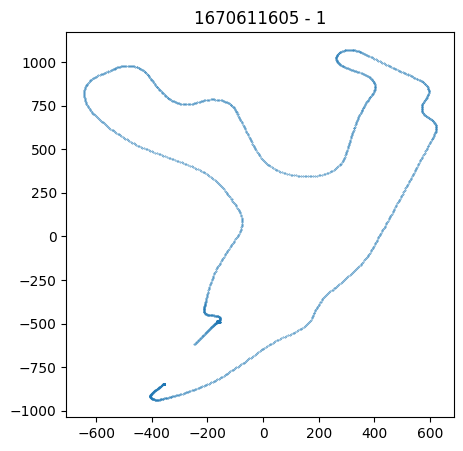

Assetto Corsa (64 bit) - akr_newcastle_2019:
1670309789 - 6


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:39:50.924730+00:00,2022-12-11 09:39:50.924730+00:00,2022-12-06 08:06:03.330165+00:00,bmw_m3_e30_dtm_rennverein,6,Assetto Corsa (64 bit),1670309789,Race,akr_newcastle_2019:,laps_cc,telegraf,crewchief/Jim/1670309789/Assetto Corsa (64 bit...,Jim,0.0,1.0,0.054,3.505956,5.0,0.0,7896.0,49.598762,0.001,1.0,-115.421577,0.462068,-77.725975


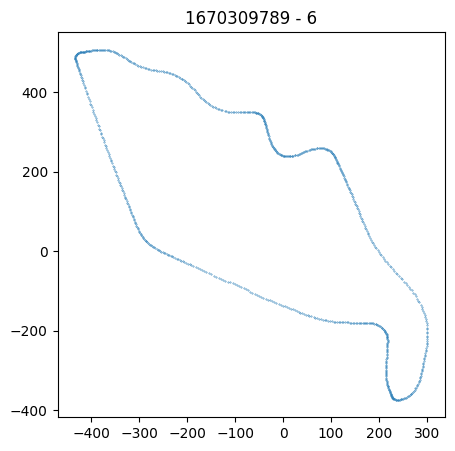

Assetto Corsa (64 bit) - ks_nurburgring:layout_gp_a_osrw
1670176465 - 5


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:39:51.851555+00:00,2022-12-11 09:39:51.851555+00:00,2022-12-04 19:01:21.762709+00:00,ks_porsche_919_hybrid_2016_evo,5,Assetto Corsa (64 bit),1670176465,Race,ks_nurburgring:layout_gp_a_osrw,laps_cc,telegraf,crewchief/Jim/1670176465/Assetto Corsa (64 bit...,Jim,0.0,1.0,0.057,5.068037,5.0,0.0,7745.0,66.67564,-0.0052,1.0,-5.279511,63.868565,-758.0682


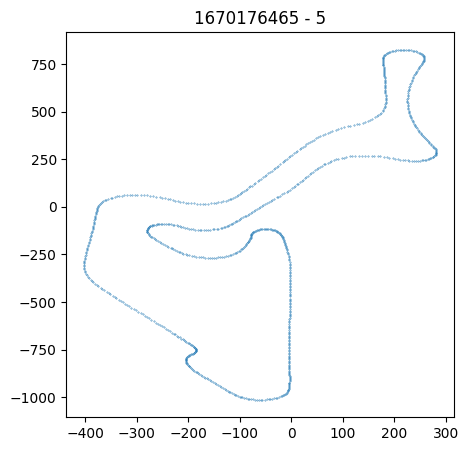

Assetto Corsa (64 bit) - gt_autodromo_lago_maggiore:z
1670340575 - 2


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:39:54.631394+00:00,2022-12-11 09:39:54.631394+00:00,2022-12-06 16:30:52.372534+00:00,rn_sandero_rs,2,Assetto Corsa (64 bit),1670340575,Race,gt_autodromo_lago_maggiore:z,laps_cc,telegraf,crewchief/Jim/1670340575/Assetto Corsa (64 bit...,Jim,0.0,1.0,0.054,5.574044,4.0,0.0,6673.0,44.26099,0.0013,1.0,-29.651564,12.526381,22.734438


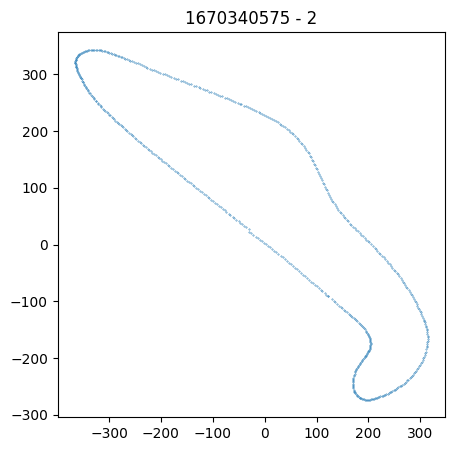

Assetto Corsa (64 bit) - kleine_nordschleife:
1670276837 - 2


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:39:55.166130+00:00,2022-12-11 09:39:55.166130+00:00,2022-12-06 08:25:43.018282+00:00,chawaii_pgrczct3,2,Assetto Corsa (64 bit),1670276837,Qualify,kleine_nordschleife:,laps_cc,telegraf,crewchief/Jim/1670276837/Assetto Corsa (64 bit...,Jim,0.0,1.0,0.036,3.52088,5.0,0.0,6042.0,59.974438,-0.0185,1.0,-691.4265,26.908684,745.0547


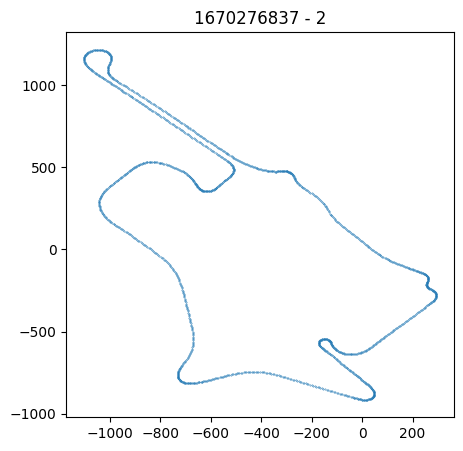

Assetto Corsa (64 bit) - albion:
1670204782 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:39:56.321732+00:00,2022-12-11 09:39:56.321732+00:00,2022-12-05 02:46:23.131507+00:00,gue_brabham_bt63_gt2,1,Assetto Corsa (64 bit),1670204782,Race,albion:,laps_cc,telegraf,crewchief/Jim/1670204782/Assetto Corsa (64 bit...,Jim,0.0,1.0,0.024,5643.993,0.0,0.0,4797.0,0.000055,0.0225,0.346187,-57.651264,-27.863733,2.614464


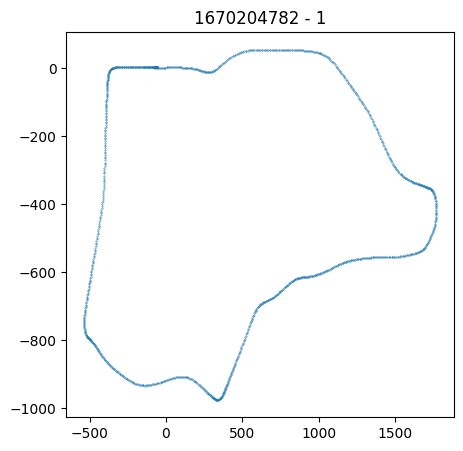

Assetto Corsa (64 bit) - ks_nordschleife:touristenfahrten
1670172778 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:39:57.022108+00:00,2022-12-11 09:39:57.022108+00:00,2022-12-04 17:52:31.636782+00:00,0,1,Assetto Corsa (64 bit),1670172778,Practice,ks_nordschleife:touristenfahrten,laps_cc,telegraf,crewchief/Richie/1670172778/Assetto Corsa (64 ...,Richie,0.0,0.083159,0.0,19303.4238,1.0,0.0,1149.0,1.692837,0.7872,0.12155,588.6443,91.08203,1432.21423


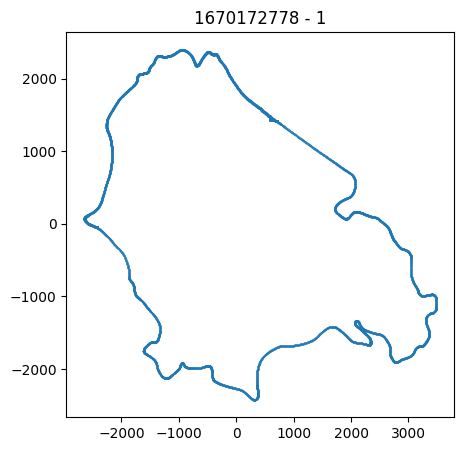

Assetto Corsa (64 bit) - mugello:
1670250967 - 4


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:01.740934+00:00,2022-12-11 09:40:01.740934+00:00,2022-12-05 15:43:27.743870+00:00,mclaren_mp412c,4,Assetto Corsa (64 bit),1670250967,Race,mugello:,laps_cc,telegraf,crewchief/Kris/1670250967/Assetto Corsa (64 bi...,Kris,0.0,1.0,0.084,6.220363,5.0,0.0,7446.0,67.39733,0.0001,1.0,-61.467247,0.756682,23.813187


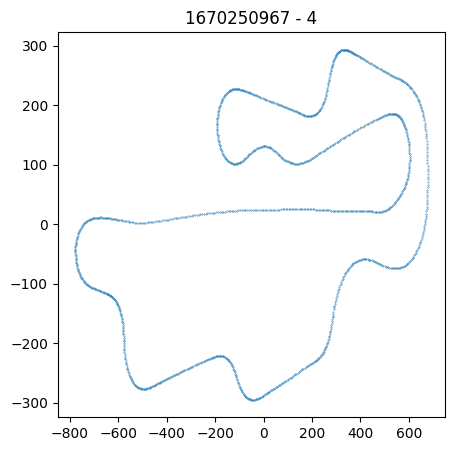

Assetto Corsa (64 bit) - mallory_park_2022:motorcycleshortcircuit
1670336518 - 6


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:02.831718+00:00,2022-12-11 09:40:02.831718+00:00,2022-12-06 14:30:40.663804+00:00,nissan_300zx_jgtc,6,Assetto Corsa (64 bit),1670336518,Practice,mallory_park_2022:motorcycleshortcircuit,laps_cc,telegraf,crewchief/Jim/1670336518/Assetto Corsa (64 bit...,Jim,0.0,1.0,0.084,5.602362,4.0,0.0,8530.0,57.839146,0.0118,1.0,41.686386,2.403402,-16.049952


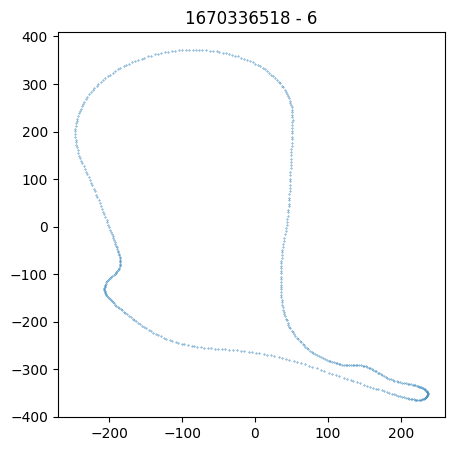

Assetto Corsa (64 bit) - rt_suzuka:suzukaeast
1670341780 - 3


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:03.542480+00:00,2022-12-11 09:40:03.542480+00:00,2022-12-06 16:52:53.329860+00:00,hd_nissangtrdday,3,Assetto Corsa (64 bit),1670341780,Practice,rt_suzuka:suzukaeast,laps_cc,telegraf,crewchief/Jim/1670341780/Assetto Corsa (64 bit...,Jim,0.0,1.0,0.018,1.923873,4.0,0.0,5674.0,49.944096,-0.034062,1.0,385.3463,-18.034729,-222.637238


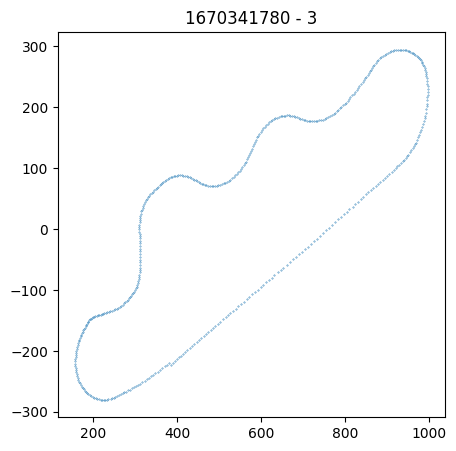

Assetto Corsa (64 bit) - zandvoort2020:drs
1670534820 - 3


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:04.236029+00:00,2022-12-11 09:40:04.236029+00:00,2022-12-08 21:31:14.540219+00:00,dallara_f317,3,Assetto Corsa (64 bit),1670534820,Practice,zandvoort2020:drs,laps_cc,telegraf,crewchief/Tec/1670534820/Assetto Corsa (64 bit...,Tec,0.0,1.0,0.093,6.805564,6.0,0.0,6534.0,66.8583,0.001125,1.0,-275.7502,19.59308,-342.32135


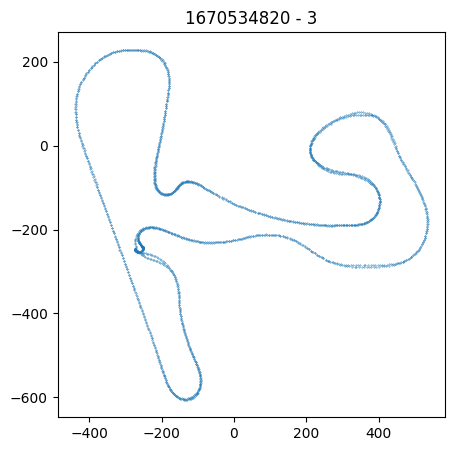

Assetto Corsa (64 bit) - ks_brands_hatch:gp
1670311616 - 2


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:07.884120+00:00,2022-12-11 09:40:07.884120+00:00,2022-12-06 08:29:04.638998+00:00,porsche_911_997_gt3_rsr,2,Assetto Corsa (64 bit),1670311616,Qualify,ks_brands_hatch:gp,laps_cc,telegraf,crewchief/Jim/1670311616/Assetto Corsa (64 bit...,Jim,0.0,1.0,0.075,6.367243,5.0,0.0,7443.0,60.38717,0.000386,1.0,-131.720917,-7.471608,-392.373322


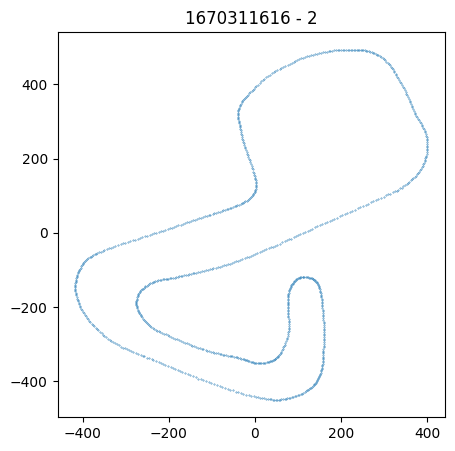

Assetto Corsa (64 bit) - ks_brands_hatch:indy
1670208520 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:08.802060+00:00,2022-12-11 09:40:08.802060+00:00,2022-12-05 03:48:41.458918+00:00,ginetta_gt4_lhd,1,Assetto Corsa (64 bit),1670208520,Qualify,ks_brands_hatch:indy,laps_cc,telegraf,crewchief/Jim/1670208520/Assetto Corsa (64 bit...,Jim,1.0,0.0,0.195,0.354732,0.0,0.0,97.0,0.087375,0.0,0.0,-129.067383,-9.336382,-371.9043


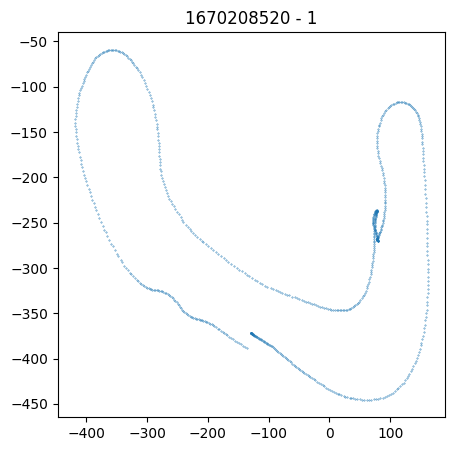

Assetto Corsa (64 bit) - lilski_road_america:
1670255190 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:09.672468+00:00,2022-12-11 09:40:09.672468+00:00,2022-12-05 15:50:17.430970+00:00,urd_maures_gtr_97,1,Assetto Corsa (64 bit),1670255190,Race,lilski_road_america:,laps_cc,telegraf,crewchief/Jim/1670255190/Assetto Corsa (64 bit...,Jim,0.0,0.0,0.063,6396.95459,1.0,0.0,7466.0,0.000432,0.0,0.664529,382.7478,-25.908318,43.111477


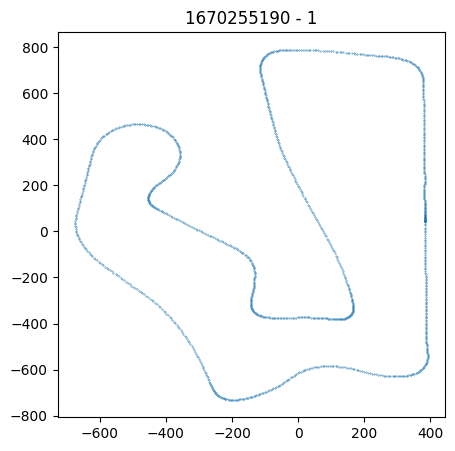

Assetto Corsa (64 bit) - acf_grand_valley:acf_grand_valley_short
1670338943 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:10.680839+00:00,2022-12-11 09:40:10.680839+00:00,2022-12-06 16:02:23.386545+00:00,rn_sandero_rs,1,Assetto Corsa (64 bit),1670338943,Race,acf_grand_valley:acf_grand_valley_short,laps_cc,telegraf,crewchief/Jim/1670338943/Assetto Corsa (64 bit...,Jim,0.0,0.0,0.042,2736.1814,0.0,0.0,996.0,0.000042,-0.0089,0.0,-53.47224,0.300358,1.847264


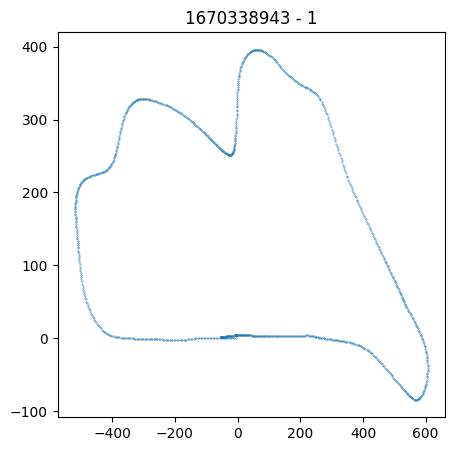

Assetto Corsa (64 bit) - acu_mexico_2021:
1670308601 - 5


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:11.666143+00:00,2022-12-11 09:40:11.666143+00:00,2022-12-06 07:47:29.244604+00:00,ks_porsche_919_hybrid_2016_evo,5,Assetto Corsa (64 bit),1670308601,Qualify,acu_mexico_2021:,laps_cc,telegraf,crewchief/Jim/1670308601/Assetto Corsa (64 bit...,Jim,0.0,1.0,0.018,0.586987,5.0,0.0,7523.0,64.623764,0.0157,1.0,-805.57,0.077177,-1018.04755


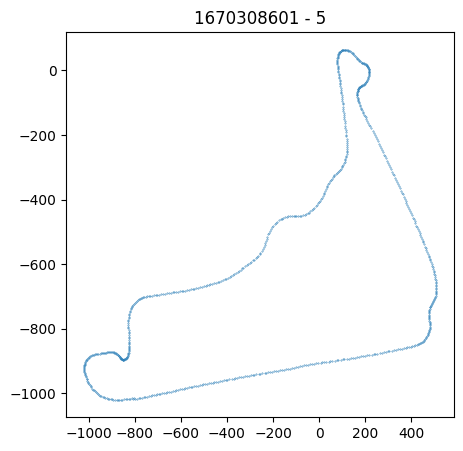

Assetto Corsa (64 bit) - ddm_gts_tsukuba:full
1670342815 - 2


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:13.320899+00:00,2022-12-11 09:40:13.320899+00:00,2022-12-06 17:08:54.135229+00:00,rn_sandero_rs,2,Assetto Corsa (64 bit),1670342815,Race,ddm_gts_tsukuba:full,laps_cc,telegraf,crewchief/Jim/1670342815/Assetto Corsa (64 bit...,Jim,0.0,1.0,0.021,1.366245,3.0,0.0,6619.0,35.736248,0.0024,1.0,-154.284042,10.597476,-175.583633


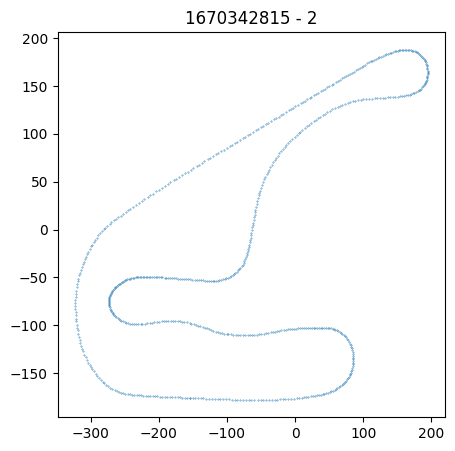

RaceRoom - Portimao Circuit
1670193938 - 2


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:14.021225+00:00,2022-12-11 09:40:14.021225+00:00,2022-12-05 00:17:32.526152+00:00,Unknown,2,RaceRoom,1670193938,HotLap,Portimao Circuit,laps_cc,telegraf,crewchief/Jim/1670193938/RaceRoom/Portimao Cir...,Jim,0.0,0.0,0.102814,8.843155,6.0,0.0,6361.26465,76.22405,0.0,1.0,-137.811218,4.962173,-97.71609


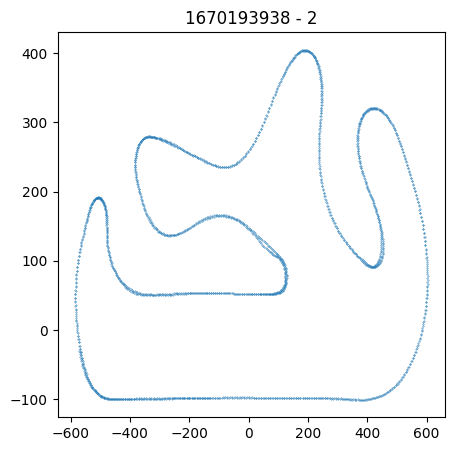

RaceRoom - Nordschleife
1670232306 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:15.168134+00:00,2022-12-11 09:40:15.168134+00:00,2022-12-05 10:25:07.246706+00:00,Unknown,1,RaceRoom,1670232306,HotLap,Nordschleife,laps_cc,telegraf,crewchief/Jim/1670232306/RaceRoom/Nordschleife...,Jim,0.0,0.0,-1.0,23766.248,2.0,0.0,8555.984,27.491356,0.0,0.006886,-479.295166,103.624008,-1495.76172


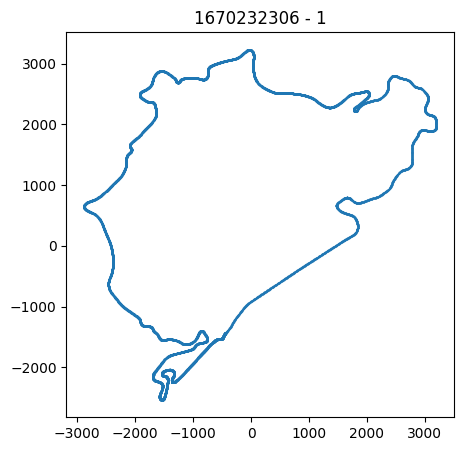

RaceRoom - Motorsport Arena Oschersleben
1670318037 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:21.008684+00:00,2022-12-11 09:40:21.008684+00:00,2022-12-06 11:13:58.911997+00:00,Unknown,1,RaceRoom,1670318037,Race,Motorsport Arena Oschersleben,laps_cc,telegraf,crewchief/Jim/1670318037/RaceRoom/Motorsport A...,Jim,1.0,1.0,0.00303,3461.67358,0.0,0.0,6016.174,0.000286,0.0,0.343086,-205.087173,4.621636,78.08999


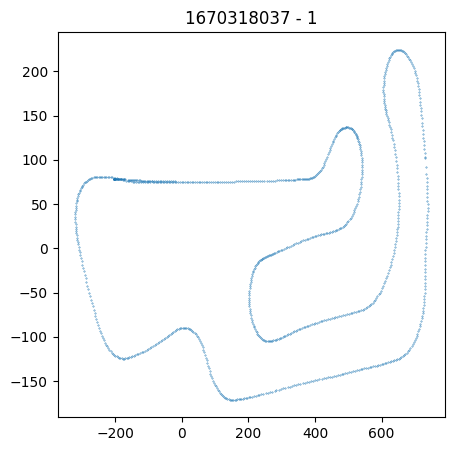

RaceRoom - Silverstone Circuit
1670586533 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapIsValid,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,LapTimePrevious,PreviousLapWasValid,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:21.848833+00:00,2022-12-11 09:40:21.848833+00:00,2022-12-09 11:48:07.966131+00:00,Unknown,1,RaceRoom,1670586533,HotLap,Silverstone Circuit,laps_cc,telegraf,crewchief/Mattw/1670586533/RaceRoom/Silverston...,Mattw,0.141009,1.0,True,-1.0,5259.01025,0.0,0.0,-1.0,False,4946.762,35.34805,0.0,0.019438,-273.480865,-2.640447,-614.2382


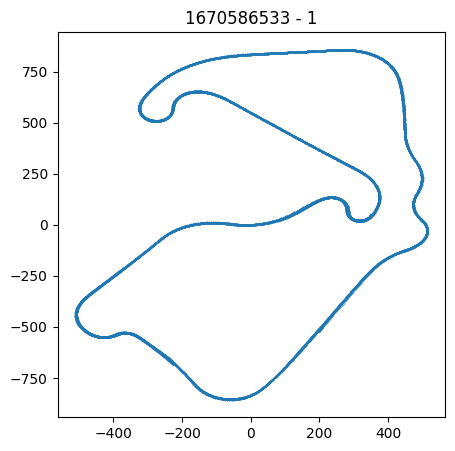

RaceRoom - Red Bull Ring Spielberg
1670616676 - 5


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:28.482009+00:00,2022-12-11 09:40:28.482009+00:00,2022-12-09 21:17:25.566970+00:00,Unknown,5,RaceRoom,1670616676,Race,Red Bull Ring Spielberg,laps_cc,telegraf,crewchief/Zoltán Dömölki/1670616676/RaceRoom/R...,Zoltán Dömölki,0.0,0.0,0.020935,1.289053,5.0,0.0,7042.344,63.17403,0.0,1.0,214.7394,-32.757954,-317.1394


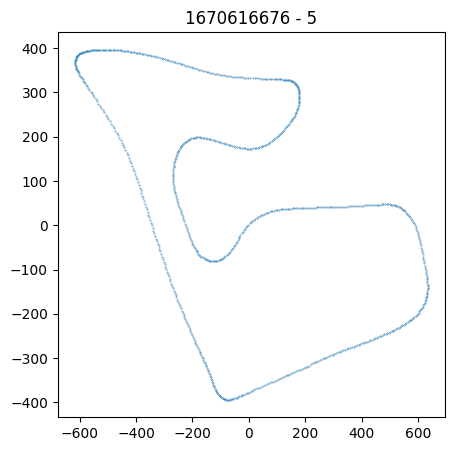

RaceRoom - Circuit Zandvoort 2019
1670319127 - 2


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:29.657580+00:00,2022-12-11 09:40:29.657580+00:00,2022-12-06 11:34:22.009896+00:00,Unknown,2,RaceRoom,1670319127,HotLap,Circuit Zandvoort 2019,laps_cc,telegraf,crewchief/Jim/1670319127/RaceRoom/Circuit Zand...,Jim,0.0,0.0,0.002457,0.723145,6.0,0.0,5447.552,58.477818,0.0,1.0,-294.5309,2.88484,331.3673


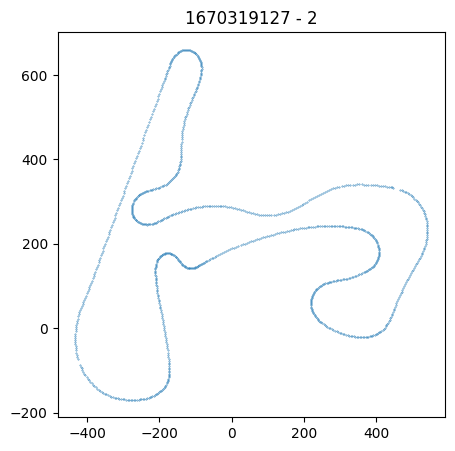

RaceRoom - Norisring
1670360042 - 13


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:30.382791+00:00,2022-12-11 09:40:30.382791+00:00,2022-12-06 21:07:58.358843+00:00,Unknown,13,RaceRoom,1670360042,Race,Norisring,laps_cc,telegraf,crewchief/Mike/1670360042/RaceRoom/Norisring/U...,Mike,0.0,0.0,0.077209,4.437744,4.0,0.0,7063.419,44.97488,0.0,1.0,30.706686,0.396149,-72.587494


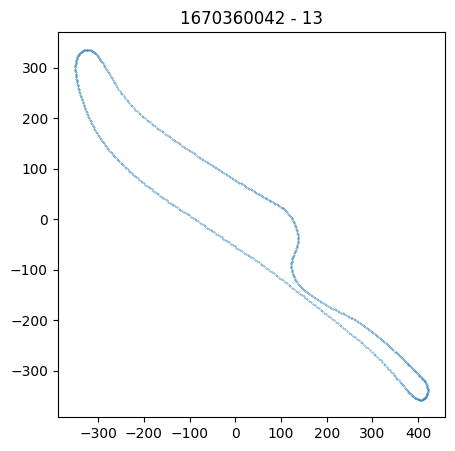

RaceRoom - Circuit Zolder
1670599606 - 5


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:31.648367+00:00,2022-12-11 09:40:31.648367+00:00,2022-12-09 16:33:01.245459+00:00,Unknown,5,RaceRoom,1670599606,Race,Circuit Zolder,laps_cc,telegraf,crewchief/Jim/1670599606/RaceRoom/Circuit Zold...,Jim,0.0,0.0,0.069092,5.259001,4.0,0.0,7097.65674,57.22819,0.0,1.0,-83.02363,-27.03073,55.876266


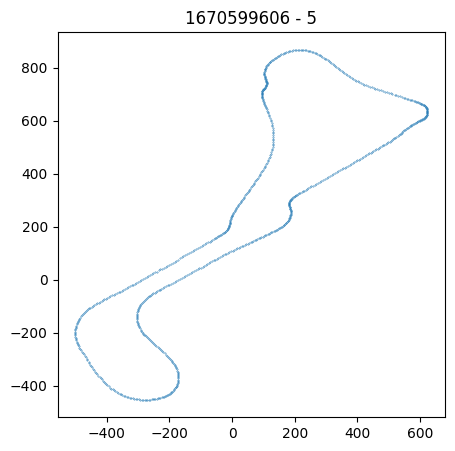

RaceRoom - Bilster Berg
1670199643 - 6


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:32.546985+00:00,2022-12-11 09:40:32.546985+00:00,2022-12-05 01:36:44.253867+00:00,Unknown,6,RaceRoom,1670199643,Qualify,Bilster Berg,laps_cc,telegraf,crewchief/Jim/1670199643/RaceRoom/Bilster Berg...,Jim,0.707284,0.0,0.078613,4.327314,3.0,0.0,7152.05859,40.800293,0.0,0.526061,-277.305267,84.95738,-333.617859


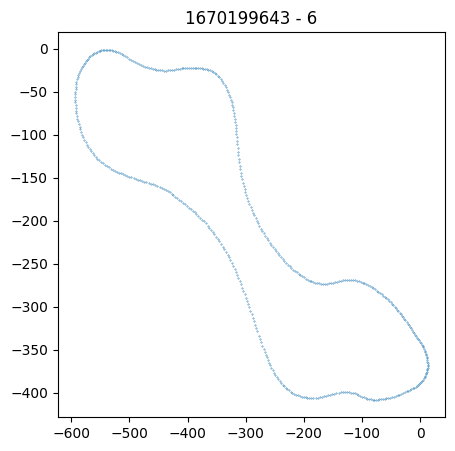

RaceRoom - Monza Circuit
1670417209 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:33.719725+00:00,2022-12-11 09:40:33.719725+00:00,2022-12-07 14:46:53.869350+00:00,Unknown,1,RaceRoom,1670417209,Race,Monza Circuit,laps_cc,telegraf,crewchief/Jim/1670417209/RaceRoom/Monza Circui...,Jim,1.0,1.0,0.006792,5547.895,0.0,0.0,7594.493,0.00008,0.0,0.25759,551.2381,-26.764543,-380.876251


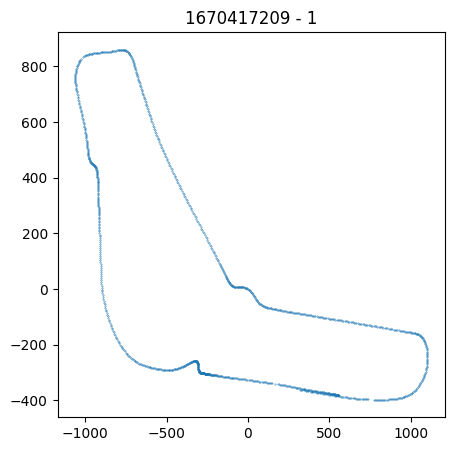

RaceRoom - Donington Park
1670312847 - 6


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:34.394450+00:00,2022-12-11 09:40:34.394450+00:00,2022-12-06 09:05:05.940042+00:00,Unknown,6,RaceRoom,1670312847,HotLap,Donington Park,laps_cc,telegraf,crewchief/Jim/1670312847/RaceRoom/Donington Pa...,Jim,0.0,0.0,0.067688,3.88483,16.0,0.0,2074.36865,43.77894,0.0,0.713096,113.562454,2.642842,-12.29328


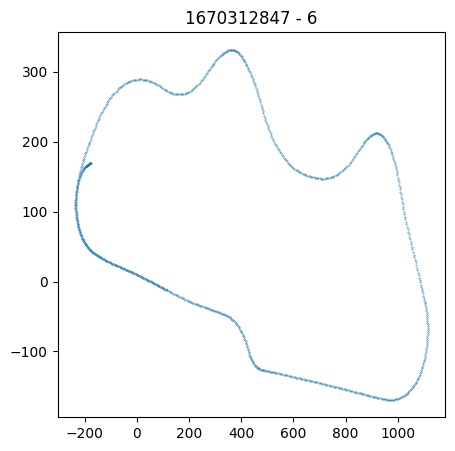

RaceRoom - Paul Ricard 2017
1670528038 - 2


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:35.925550+00:00,2022-12-11 09:40:35.925550+00:00,2022-12-08 20:39:02.082450+00:00,Unknown,2,RaceRoom,1670528038,Practice,Paul Ricard 2017,laps_cc,telegraf,crewchief/Jim/1670528038/RaceRoom/Paul Ricard ...,Jim,0.0,0.0,0.028351,2.746759,4.0,0.0,6236.02637,55.87058,0.0,1.0,105.281059,-43.651722,-113.400826


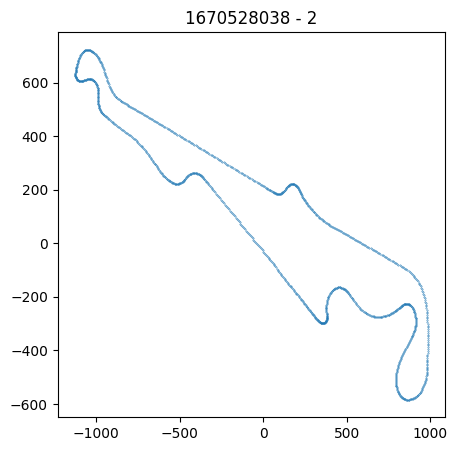

RaceRoom - Sepang
1670348161 - 3


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:36.822958+00:00,2022-12-11 09:40:36.822958+00:00,2022-12-06 18:38:53.463033+00:00,Unknown,3,RaceRoom,1670348161,HotLap,Sepang,laps_cc,telegraf,crewchief/Zoltán Dömölki/1670348161/RaceRoom/S...,Zoltán Dömölki,0.0,0.0,0.057373,4.159647,5.0,0.0,5157.068,51.264507,0.0,1.0,190.276184,-0.594257,1.258867


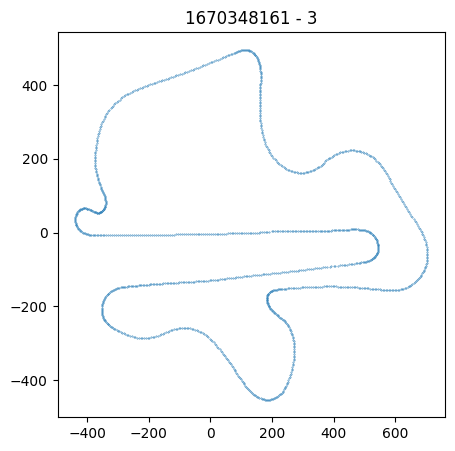

RaceRoom - Nogaro Circuit Paul Armagnac
1670311738 - 4


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:37.624459+00:00,2022-12-11 09:40:37.624459+00:00,2022-12-06 02:33:56.396304+00:00,Unknown,4,RaceRoom,1670311738,Race,Nogaro Circuit Paul Armagnac,laps_cc,telegraf,crewchief/Emery/1670311738/RaceRoom/Nogaro Cir...,Emery,0.0,0.0,0.08783,5.271944,5.0,0.0,5890.70752,51.681,0.0,1.0,-58.387882,3.664226,485.384


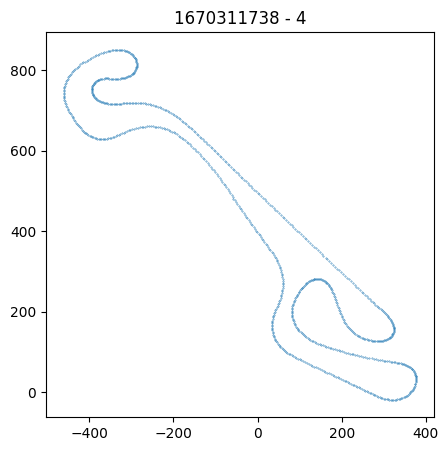

Assetto Corsa Competizione - Imola:track config
1670210068 - 6


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:39.534704+00:00,2022-12-11 09:40:39.534704+00:00,2022-12-05 04:26:41.688962+00:00,Unknown,6,Assetto Corsa Competizione,1670210068,Qualify,Imola:track config,laps_cc,telegraf,crewchief/Kris/1670210068/Assetto Corsa Compet...,Kris,0.0,1.0,0.057,2.149197,5.0,0.0,6878.0,65.873115,0.0,1.0,219.523819,0.0,388.718262


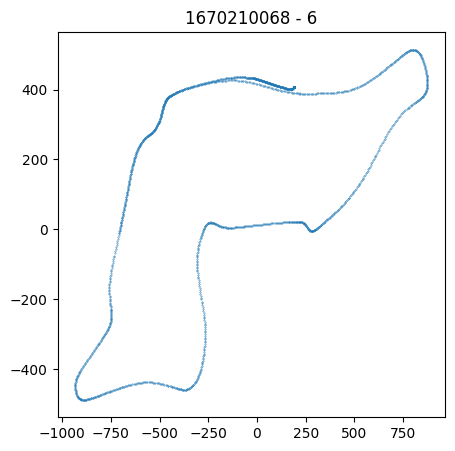

Assetto Corsa Competizione - mount_panorama:track config
1670607186 - 2


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:41.189651+00:00,2022-12-11 09:40:41.189651+00:00,2022-12-09 18:40:42.837306+00:00,Unknown,2,Assetto Corsa Competizione,1670607186,Race,mount_panorama:track config,laps_cc,telegraf,crewchief/Jim/1670607186/Assetto Corsa Competi...,Jim,0.0,1.0,0.17,5.437513,2.0,0.0,7068.0,40.953007,0.0,1.0,259.593262,0.0,561.029968


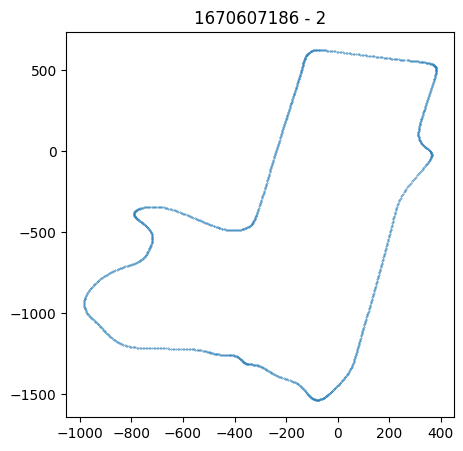

Assetto Corsa Competizione - Spa:track config
1670525280 - 3


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:42.413967+00:00,2022-12-11 09:40:42.413967+00:00,2022-12-08 19:53:56.105536+00:00,Unknown,3,Assetto Corsa Competizione,1670525280,HotLap,Spa:track config,laps_cc,telegraf,crewchief/Jim/1670525280/Assetto Corsa Competi...,Jim,0.0,1.0,0.66,0.0,4.0,0.0,7552.0,48.41364,0.0,1.0,-1076.89246,0.0,1895.378


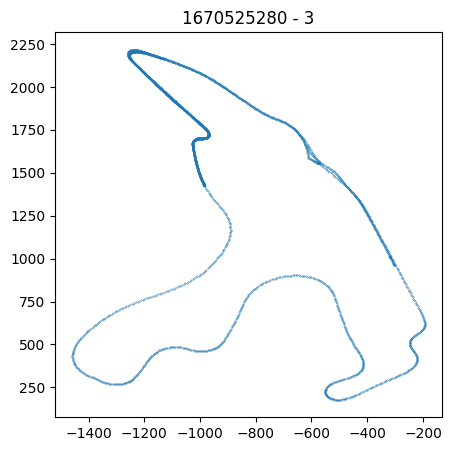

Assetto Corsa Competizione - Hungaroring:track config
1670332852 - 28


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:45.011522+00:00,2022-12-11 09:40:45.011522+00:00,2022-12-06 15:33:05.530888+00:00,Unknown,28,Assetto Corsa Competizione,1670332852,Practice,Hungaroring:track config,laps_cc,telegraf,crewchief/Jim/1670332852/Assetto Corsa Competi...,Jim,0.0,1.0,0.117,4.768597,4.0,0.0,8294.0,53.253338,0.0,1.0,-108.555168,0.0,-545.6741


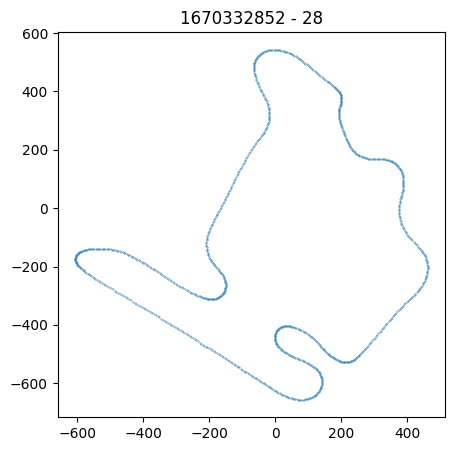

Assetto Corsa Competizione - brands_hatch:track config
1670228763 - 52


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:49.746061+00:00,2022-12-11 09:40:49.746061+00:00,2022-12-05 03:48:59.065801+00:00,Unknown,52,Assetto Corsa Competizione,1670228763,Practice,brands_hatch:track config,laps_cc,telegraf,crewchief/Jim/1670228763/Assetto Corsa Competi...,Jim,0.0,1.0,0.385,21.793987,5.0,0.0,6676.0,62.045925,0.0,1.0,-107.098145,0.0,396.992828


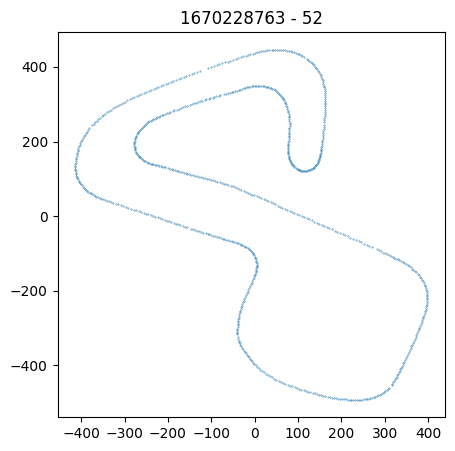

Assetto Corsa Competizione - monza:track config
1670194700 - 8


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:51.280966+00:00,2022-12-11 09:40:51.280966+00:00,2022-12-05 00:11:53.435089+00:00,Unknown,8,Assetto Corsa Competizione,1670194700,Race,monza:track config,laps_cc,telegraf,crewchief/Kris/1670194700/Assetto Corsa Compet...,Kris,0.0,1.0,0.28,15.785909,5.0,0.0,6770.0,65.93412,0.0,1.0,-387.6589,0.0,-542.7359


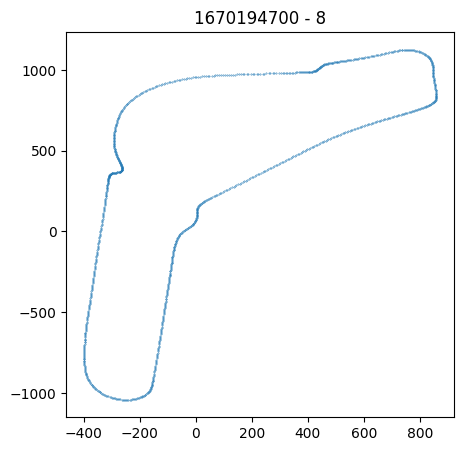

Assetto Corsa Competizione - Zandvoort:track config
1670529687 - 7


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:52.834146+00:00,2022-12-11 09:40:52.834146+00:00,2022-12-08 20:12:56.616049+00:00,Unknown,7,Assetto Corsa Competizione,1670529687,Practice,Zandvoort:track config,laps_cc,telegraf,crewchief/Jim/1670529687/Assetto Corsa Competi...,Jim,0.0,1.0,0.182,10.989586,5.0,0.0,7035.0,65.51025,0.0,1.0,-226.5827,0.0,74.40355


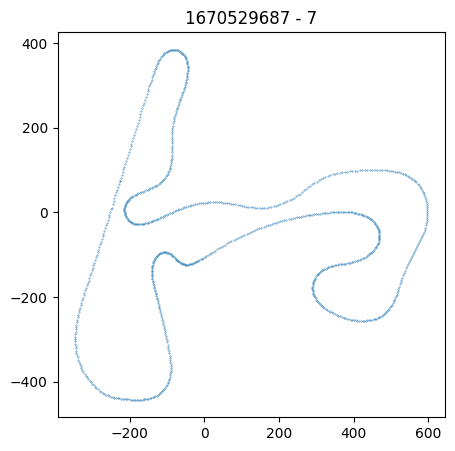

Assetto Corsa Competizione - misano:track config
1670274757 - 22


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:53.783004+00:00,2022-12-11 09:40:53.783004+00:00,2022-12-05 23:00:56.963769+00:00,Unknown,22,Assetto Corsa Competizione,1670274757,Qualify,misano:track config,laps_cc,telegraf,crewchief/Jim/1670274757/Assetto Corsa Competi...,Jim,0.0,1.0,0.187,9.88667,6.0,0.0,6889.0,59.89456,0.0,1.0,80.12826,0.0,-4.134859


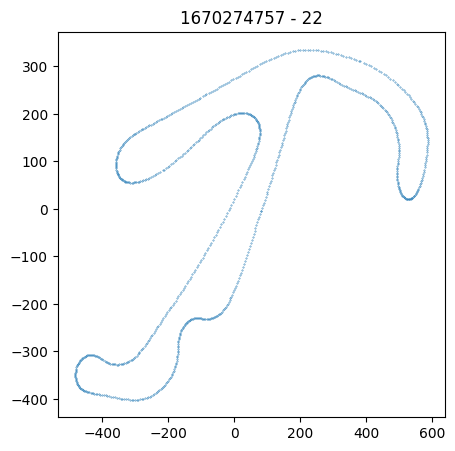

Assetto Corsa Competizione - Zolder:track config
1670270559 - 5


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:56.649322+00:00,2022-12-11 09:40:56.649322+00:00,2022-12-05 21:09:44.903495+00:00,Unknown,5,Assetto Corsa Competizione,1670270559,HotLap,Zolder:track config,laps_cc,telegraf,crewchief/Rico/1670270559/Assetto Corsa Compet...,Rico,0.0,1.0,0.032,0.0,4.0,0.0,6482.0,54.65712,0.0,1.0,1311.10754,0.0,1027.37036


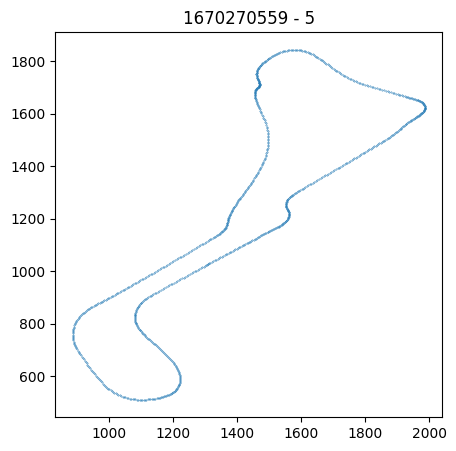

Assetto Corsa Competizione - Barcelona:track config
1670185932 - 4


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:57.713102+00:00,2022-12-11 09:40:57.713102+00:00,2022-12-04 21:38:22.917982+00:00,Unknown,4,Assetto Corsa Competizione,1670185932,Race,Barcelona:track config,laps_cc,telegraf,crewchief/Jim/1670185932/Assetto Corsa Competi...,Jim,0.0,1.0,0.122,4.000753,4.0,0.0,6846.0,52.041424,0.0,1.0,363.238922,0.0,183.6708


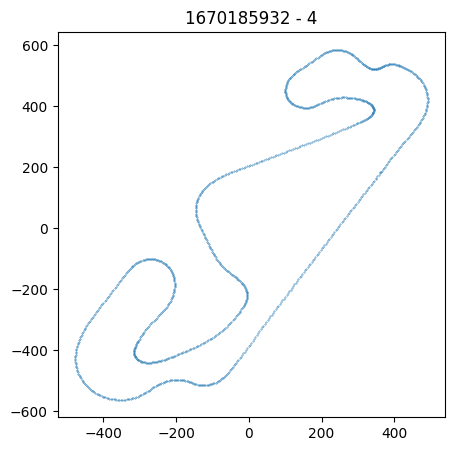

Assetto Corsa Competizione - nurburgring:track config
1670258148 - 4


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:40:58.820878+00:00,2022-12-11 09:40:58.820878+00:00,2022-12-05 18:41:02.875992+00:00,Unknown,4,Assetto Corsa Competizione,1670258148,Race,nurburgring:track config,laps_cc,telegraf,crewchief/Jude/1670258148/Assetto Corsa Compet...,Jude,0.0,1.0,0.315,15.742646,4.0,0.0,8414.0,54.035557,0.0,1.0,333.120941,0.0,533.1761


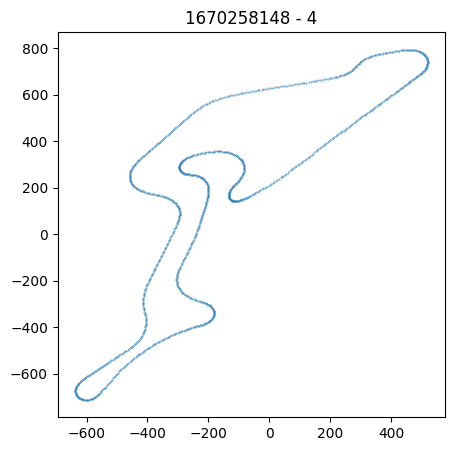

Assetto Corsa Competizione - watkins_glen:track config
1670331670 - 4


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:00.805423+00:00,2022-12-11 09:41:00.805423+00:00,2022-12-06 05:06:40.244972+00:00,Unknown,4,Assetto Corsa Competizione,1670331670,Practice,watkins_glen:track config,laps_cc,telegraf,crewchief/Jim/1670331670/Assetto Corsa Competi...,Jim,0.0,1.0,0.23,13.068776,5.0,0.0,6150.0,62.63338,0.0,1.0,1108.17908,0.0,-539.6324


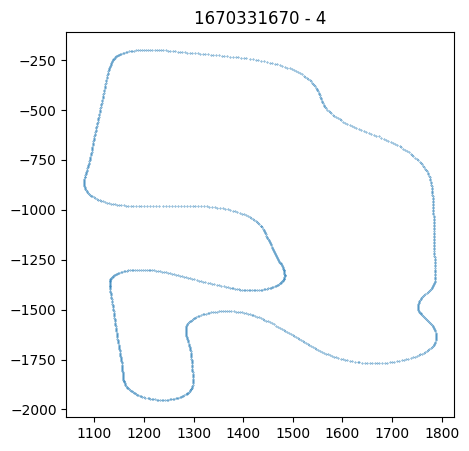

Assetto Corsa Competizione - Suzuka:track config
1670188853 - 9


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:01.880652+00:00,2022-12-11 09:41:01.880652+00:00,2022-12-04 22:41:45.078792+00:00,Unknown,9,Assetto Corsa Competizione,1670188853,Qualify,Suzuka:track config,laps_cc,telegraf,crewchief/Jim/1670188853/Assetto Corsa Competi...,Jim,0.0,1.0,0.107,5.427821,5.0,0.0,6506.0,66.15097,0.0,1.0,650.0058,0.0,64.26161


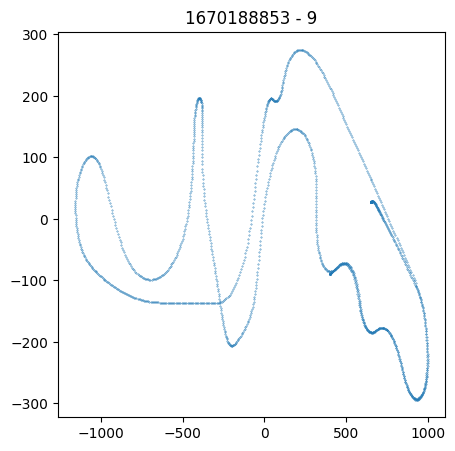

Automobilista 2 - SpaFrancorchamps:Spa_Francorchamps_1970
1670355483 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:03.944334+00:00,2022-12-11 09:41:03.944334+00:00,2022-12-06 20:38:03.353841+00:00,Porsche 911 RSR GTE,1,Automobilista 2,1670355483,Race,SpaFrancorchamps:Spa_Francorchamps_1970,laps_cc,telegraf,crewchief/durandom/1670355483/Automobilista 2/...,durandom,0.0,0.99725,-3.0,0.0,1.0,0.0,4690.433,0.690102,-0.007786,0.0,-56.17785,8.064023,800.4906


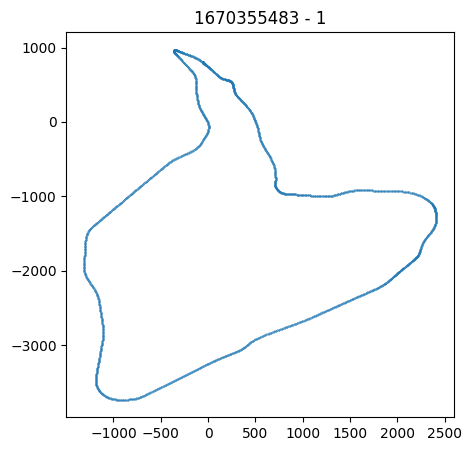

Automobilista 2 - Nurburgring_2020:Nurb_GP_2020_Veedol
1670584820 - 3


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapIsValid,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,LapTimePrevious,PreviousLapWasValid,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:04.918812+00:00,2022-12-11 09:41:04.918812+00:00,2022-12-09 12:27:31.193622+00:00,Porsche 911 RSR GTE,3,Automobilista 2,1670584820,Practice,Nurburgring_2020:Nurb_GP_2020_Veedol,laps_cc,telegraf,crewchief/goern/1670584820/Automobilista 2/Nur...,goern,0.0,0.0,True,62.79413,6.1408,5.0,0.0,122.977844,True,8443.941,65.342804,0.0,1.0,125.009926,-7.795475,124.348717


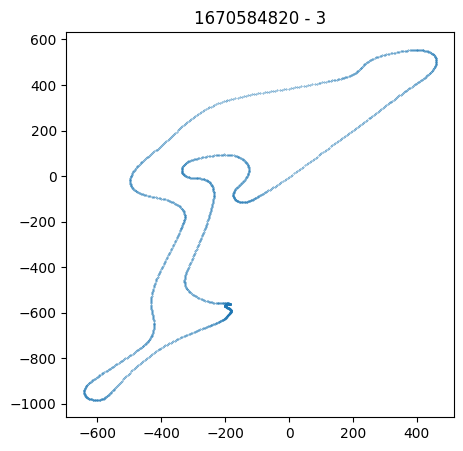

Automobilista 2 - Fontana:Fontana_OVAL
1670355905 - 41


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:05.741685+00:00,2022-12-11 09:41:05.741685+00:00,2022-12-06 21:08:24.708904+00:00,Reynard 2Ki Ford-Cosworth - Superspeedway,41,Automobilista 2,1670355905,Race,Fontana:Fontana_OVAL,laps_cc,telegraf,crewchief/Jim/1670355905/Automobilista 2/Fonta...,Jim,0.0,0.0,18.270508,4.054709,6.0,0.0,13853.0635,107.310112,-0.012267,1.0,-0.652651,4.381582,-311.838074


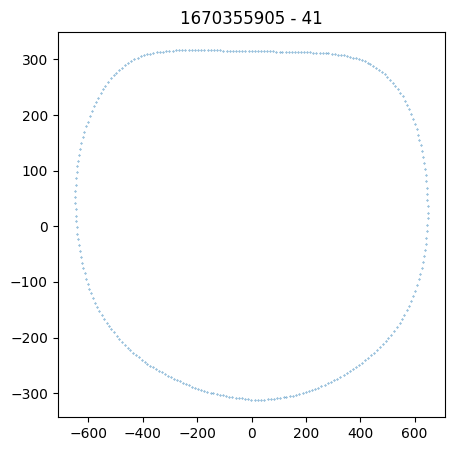

Automobilista 2 - Laguna_Seca:Laguna_Seca_2020
1670176288 - 5


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:07.734116+00:00,2022-12-11 09:41:07.734116+00:00,2022-12-04 18:56:43.670741+00:00,Reynard 95i Ford-Cosworth,5,Automobilista 2,1670176288,HotLap,Laguna_Seca:Laguna_Seca_2020,laps_cc,telegraf,crewchief/Jim/1670176288/Automobilista 2/Lagun...,Jim,0.0,0.0,55.50528,6.095773,4.0,0.0,13187.7813,72.050095,-0.005852,1.0,-311.247925,15.153473,216.550461


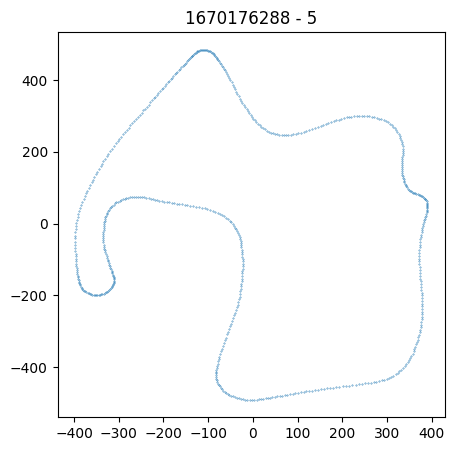

Automobilista 2 - Buenos_Aires:Buenos_Aires_Circuito_8
1670219852 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:08.564371+00:00,2022-12-11 09:41:08.564371+00:00,2022-12-04 23:58:01.379522+00:00,Formula Trainer,1,Automobilista 2,1670219852,Practice,Buenos_Aires:Buenos_Aires_Circuito_8,laps_cc,telegraf,crewchief/Jim/1670219852/Automobilista 2/Bueno...,Jim,1.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.005135,0.0,0.0,-301.7249,-7.410196,-182.818558


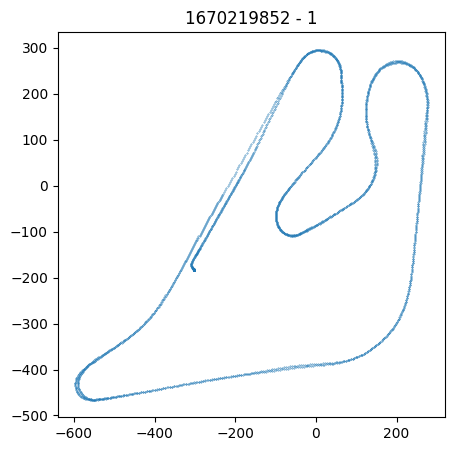

Automobilista 2 - Road_America:Road_America_RC
1670262517 - 5


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:10.946148+00:00,2022-12-11 09:41:10.946148+00:00,2022-12-05 18:56:01.528184+00:00,Lola B2K00 Ford-Cosworth,5,Automobilista 2,1670262517,HotLap,Road_America:Road_America_RC,laps_cc,telegraf,crewchief/Jim/1670262517/Automobilista 2/Road_...,Jim,0.0,0.0,56.765625,2.82935,5.0,0.0,13923.0762,86.37682,0.00363,1.0,527.391968,22.002758,-41.06762


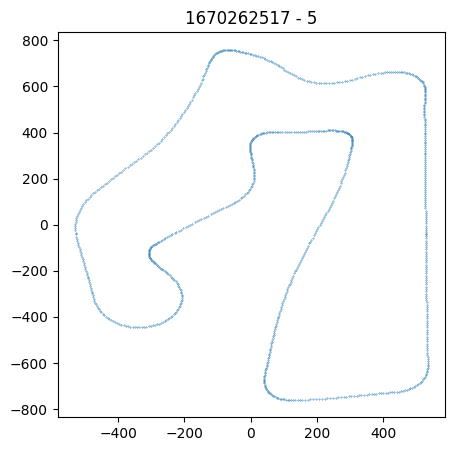

Automobilista 2 - Long_Beach:Long_Beach
1670176939 - 5


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:11.990215+00:00,2022-12-11 09:41:11.990215+00:00,2022-12-04 19:09:03.572452+00:00,Reynard 95i Ford-Cosworth,5,Automobilista 2,1670176939,HotLap,Long_Beach:Long_Beach,laps_cc,telegraf,crewchief/Jim/1670176939/Automobilista 2/Long_...,Jim,0.0,0.0,51.347656,4.313094,4.0,0.0,13239.0625,72.18411,0.047518,1.0,399.792358,3.344404,-171.347748


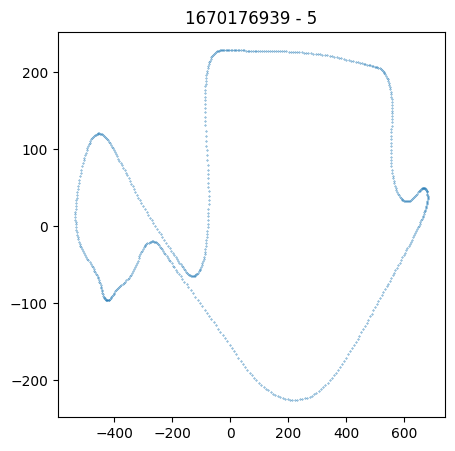

Automobilista 2 - Nurburgring_2020:Nordschleife_2020
1670291401 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:13.056412+00:00,2022-12-11 09:41:13.056412+00:00,2022-12-06 02:50:02.749399+00:00,Porsche 911 RSR 74,1,Automobilista 2,1670291401,Qualify,Nurburgring_2020:Nordschleife_2020,laps_cc,telegraf,crewchief/Jim/1670291401/Automobilista 2/Nurbu...,Jim,1.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,487.582184,-2.365403,615.3131


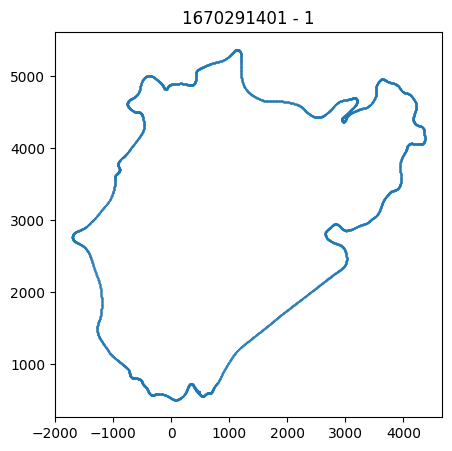

Automobilista 2 - Cordoba:Cordoba_International
1670273734 - 3


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:15.067823+00:00,2022-12-11 09:41:15.067823+00:00,2022-12-05 21:58:35.569809+00:00,Dallara F301,3,Automobilista 2,1670273734,HotLap,Cordoba:Cordoba_International,laps_cc,telegraf,crewchief/Jim/1670273734/Automobilista 2/Cordo...,Jim,0.0,0.0,48.616333,3.307126,5.0,0.0,5957.357,59.829186,0.006148,1.0,-271.5595,1.253416,5.313587


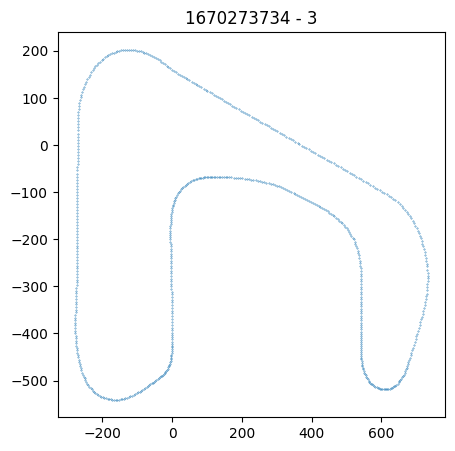

Automobilista 2 - Nurburgring_2020:Nordschleife_2020_24hr
1670320975 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:15.761584+00:00,2022-12-11 09:41:15.761584+00:00,2022-12-06 11:02:56.609117+00:00,Ginetta G58,1,Automobilista 2,1670320975,Practice,Nurburgring_2020:Nordschleife_2020_24hr,laps_cc,telegraf,crewchief/Jim/1670320975/Automobilista 2/Nurbu...,Jim,1.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.007373,0.0,0.0,235.494644,-6.521489,290.421875


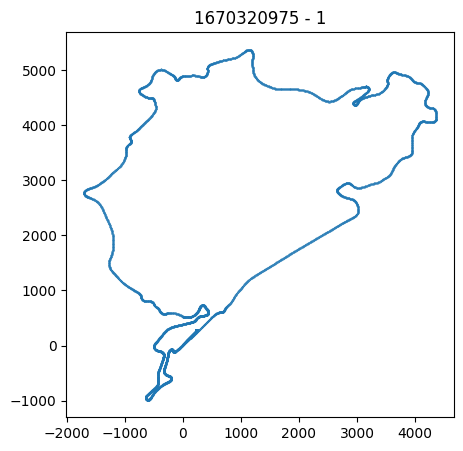

Automobilista 2 - Brasilia:Brasilia_Full
1670272021 - 6


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:18.243577+00:00,2022-12-11 09:41:18.243577+00:00,2022-12-05 21:50:23.316721+00:00,Chevrolet Cruze Stock Car 2022,6,Automobilista 2,1670272021,HotLap,Brasilia:Brasilia_Full,laps_cc,telegraf,crewchief/Jim/1670272021/Automobilista 2/Brasi...,Jim,0.0,0.0,88.15015,5.205401,5.0,0.0,5288.286,55.263508,0.001407,1.0,-57.00423,-8.469595,8.859921


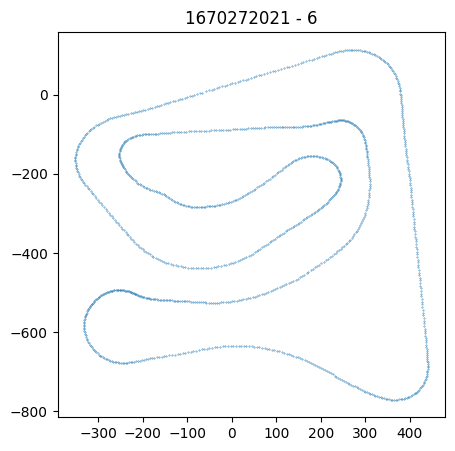

Automobilista 2 - Jerez:Standard
1670180859 - 3


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:19.865838+00:00,2022-12-11 09:41:19.865838+00:00,2022-12-04 20:10:56.440197+00:00,Formula Classic Gen3 Model1,3,Automobilista 2,1670180859,HotLap,Jerez:Standard,laps_cc,telegraf,crewchief/Jim/1670180859/Automobilista 2/Jerez...,Jim,0.0,0.0,59.37207,7.25668,0.0,0.0,14143.7207,75.47016,0.0028,0.0,-38.980393,-0.063356,216.7219


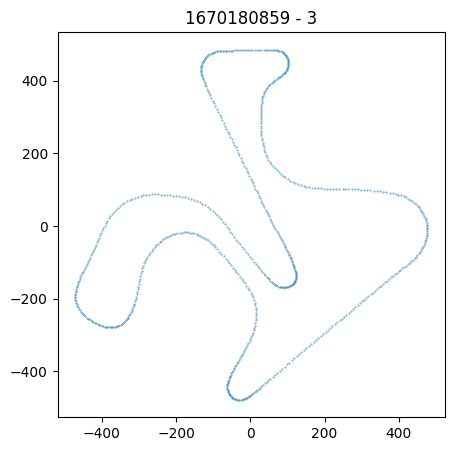

Automobilista 2 - Watkins_Glen:Watkins_Glen_GP
1670180008 - 3


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:21.009795+00:00,2022-12-11 09:41:21.009795+00:00,2022-12-04 19:59:34.388733+00:00,Lola T9500 Mercedes-Benz,3,Automobilista 2,1670180008,HotLap,Watkins_Glen:Watkins_Glen_GP,laps_cc,telegraf,crewchief/Jim/1670180008/Automobilista 2/Watki...,Jim,0.0,0.0,57.957764,6.591159,5.0,0.0,12788.2158,77.8607,0.007037,1.0,-327.673676,30.39711,526.887451


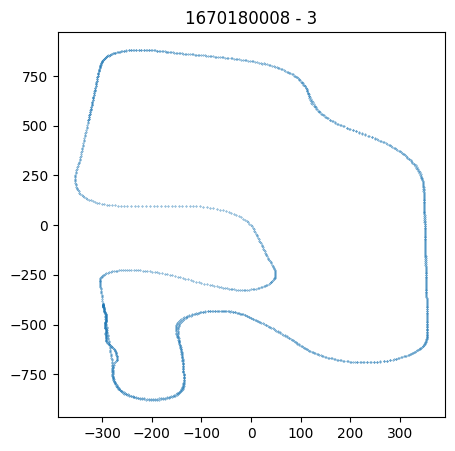

Race Room - Interlagos
1670526851 - 4


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:22.362562+00:00,2022-12-11 09:41:22.362562+00:00,2022-12-08 20:19:42.788117+00:00,Unknown,4,Race Room,1670526851,Qualify,Interlagos,laps_cc,telegraf,crewchief/Jim/1670526851/Race Room/Interlagos/...,Jim,0.0,0.0,0.053558,2.897461,6.0,0.0,5906.71875,68.18077,0.0,1.0,-423.466827,13.998048,-193.079117


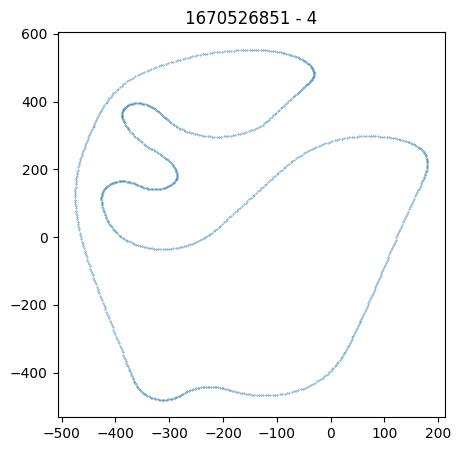

Race Room - Monza Circuit
1670178835 - 5


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:23.526568+00:00,2022-12-11 09:41:23.526568+00:00,2022-12-04 19:42:54.593811+00:00,Unknown,5,Race Room,1670178835,Race,Monza Circuit,laps_cc,telegraf,crewchief/Jim/1670178835/Race Room/Monza Circu...,Jim,0.0,0.0,0.040222,2.749941,6.0,0.0,7230.462,63.754227,0.0,1.0,312.2475,-26.1954,-363.4903


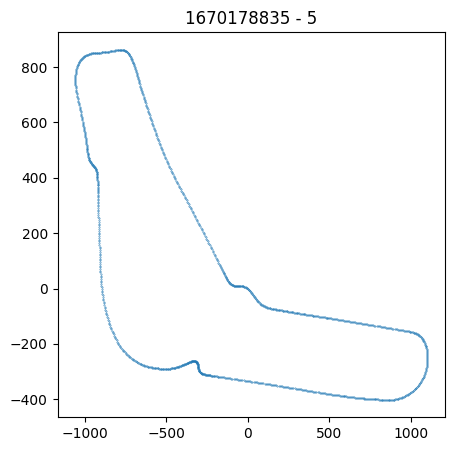

Race Room - Watkins Glen International
1670616759 - 1


,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,TrackCode,_measurement,host,topic,user,Brake,Clutch,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-10 21:41:24.896329+00:00,2022-12-11 09:41:24.896329+00:00,2022-12-09 21:12:44.297689+00:00,Unknown,1,Race Room,1670616759,Qualify,Watkins Glen International,laps_cc,telegraf,crewchief/Jim/1670616759/Race Room/Watkins Gle...,Jim,0.0,0.0,-1.0,4638.943,2.0,0.0,6071.718,28.672058,0.0,1.0,-97.90319,10.230724,87.77901


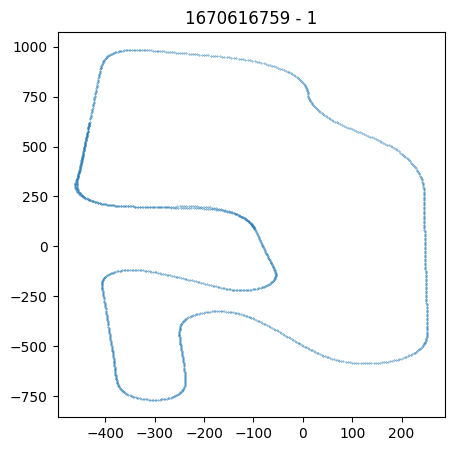

In [67]:
def plot_tracks(sessions):
    for session in sessions:
        for lap in sessions[session]:
            df = query_session_lap(session, lap)
            yield
            if game == "Assetto Corsa (64 bit)" or game == "Automobilista 2":
                plt.scatter(df.WorldPosition_x, df.WorldPosition_z, s=0.1)

            elif game == "Assetto Corsa Competizione":
                # flip y axis
                df["WorldPosition_z"] = df["WorldPosition_z"] * -1
                plt.scatter(df.WorldPosition_x, df.WorldPosition_z, s=0.1)
            else:
                plt.scatter(df.WorldPosition_x, df.WorldPosition_z, s=0.1)
            plt.title(f"{session} - {lap}")
            print(f"{session} - {lap}")
            display(df.head(n=1))
            break
        break


for game in tracks:
    if game == "iRacing":
        continue  # iRacing has not coordinates
    for track in tracks[game]:
        print(f"{game} - {track}")
        multiplot_from_generator(
            plot_tracks(tracks[game][track]), 1, figsize_for_one_row=(5, 5 / 1)
        )